# Watershed
This refers to a transformation that treats a grayscale image as a topographical map and finds lines between pixels of equal brightness. These lines are then used to segment the image into regions.

1) **Watershed by flooding**
2) **Watershed by topographic distance**
3) **Watershed by drop of water principle**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import data, util, filters, color
from skimage.morphology import watershed

https://www.pexels.com/photo/bokeh-shot-of-water-droplets-794495/

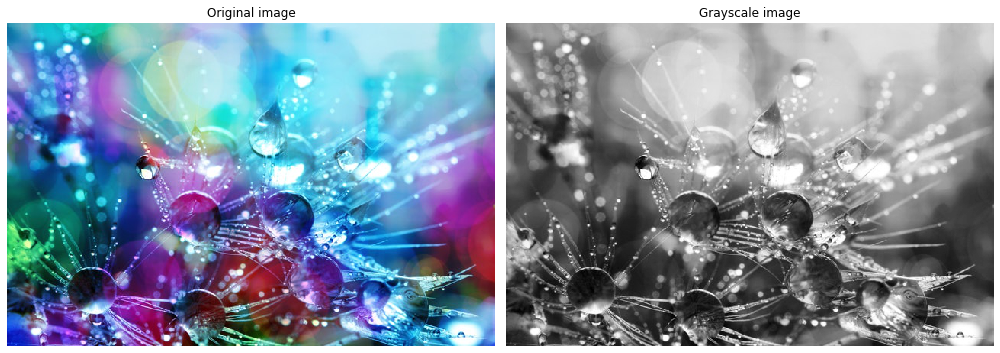

In [9]:
bubs = io.imread('./images/pexels-bubbles.jpg')
bubbles = color.rgb2gray(io.imread('./images/pexels-bubbles.jpg'))

fig, ax = plt.subplots(1, 2, 
                       figsize=(14, 12), 
                       sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(bubs, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(bubbles, cmap='gray')
ax[1].set_title('Grayscale image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


Find the edges of shapes in the image using <b>Sobel Edge detector</b>

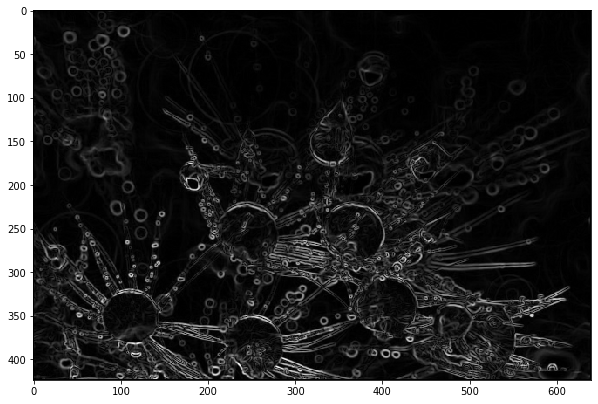

In [3]:
bubble_edges = filters.sobel(bubbles)

plt.figure(figsize=(10,10))
plt.imshow(bubble_edges, cmap='gray')

Find n_points regularly spaced points along each dimension of the input image. Returns slices along each dimension of image.shape. For a 2D image will return 2 slices

The intersection of all the slices gives the coordinates of regularly spaced points.

In [4]:
grid = util.regular_grid(bubbles.shape, n_points=300)

grid

(slice(15, None, 30), slice(15, None, 30))

### Initialize seeds for the watershed algorithm

Seed is a local gradient minima iterating pixel by pixel until it reach the border of another seed on a uniform grid for segmentation

* Create an seed array containing all zeros with the same shape as the original image.
* Arrange the seed array where all its elements are evenly spaced and the size and shape of seed array is same as the input image. (values range from 1 to the size of the image)

In [5]:
seeds = np.zeros(bubbles.shape, dtype=int)

seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

## Classic Watershed 

<b>Find watershed basins in image flooded from given seeds)</b>

* <b>edges</b> = Data array to label data points
* <b>seeds</b> = the number of markers marking the basins to be filled with water (label)

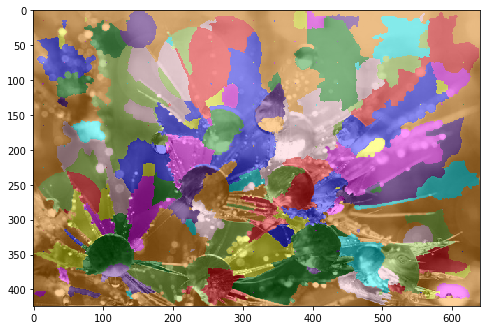

In [6]:
w0 = watershed(bubble_edges, seeds)

water_classic = color.label2rgb(w0, bubbles, alpha=0.4, kind='overlay')

plt.figure(figsize=(8, 8))
plt.imshow(water_classic)

## Compact Watershed

<b>Find compact watershed basins using compactness parameter.</b>

* <b>edges</b> = Data array to label data points
* <b>seeds</b> = the number of markers marking the basins to be filled with water (label)
* <b>compactness</b> = Compactness Parameter; <b>Higher values result in more regularly-shaped watershed basins.</b>

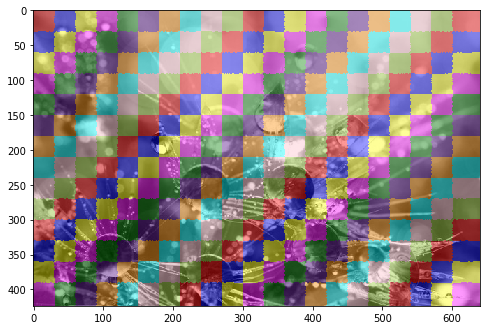

In [7]:
w1 = watershed(bubble_edges, seeds, compactness=0.91)

water_compact = color.label2rgb(w1, bubbles, alpha=0.4, kind='overlay')

plt.figure(figsize=(8,8))
plt.imshow(water_compact)